In [ ]:
import numpy as np # linear algebra
import pandas as pd# data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, StackingClassifier
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier








/kaggle/input/ai-assistant-usage-in-student-life-synthetic/ai_assistant_usage_student_life.csv


#### Part A: Basic EDA


In [2]:
#1.Load the dataset and display the first 5 rows.
df=pd.read_csv("/kaggle/input/ai-assistant-usage-in-student-life-synthetic/ai_assistant_usage_student_life.csv")
df.head(5)

,SessionID,StudentLevel,Discipline,SessionDate,SessionLengthMin,TotalPrompts,TaskType,AI_AssistanceLevel,FinalOutcome,UsedAgain,SatisfactionRating
0,SESSION00001,Undergraduate,Computer Science,2024-11-03,31.20,11,Studying,2,Assignment Completed,True,1.0
1,SESSION00002,Undergraduate,Psychology,2024-08-25,13.09,6,Studying,3,Assignment Completed,True,2.0
2,SESSION00003,Undergraduate,Business,2025-01-12,19.22,5,Coding,3,Assignment Completed,True,3.3
3,SESSION00004,Undergraduate,Computer Science,2025-05-06,3.70,1,Coding,3,Assignment Completed,True,3.5
4,SESSION00005,Undergraduate,Psychology,2025-03-18,28.12,9,Writing,3,Assignment Completed,True,2.9


In [3]:
#2.Check the dataset shape (rows, columns).
df.shape

(10000, 11)

In [4]:
#3.Display column names and their data types.
df.dtypes

SessionID              object
StudentLevel           object
Discipline             object
SessionDate            object
SessionLengthMin      float64
TotalPrompts            int64
TaskType               object
AI_AssistanceLevel      int64
FinalOutcome           object
UsedAgain                bool
SatisfactionRating    float64
dtype: object

In [5]:
#4.Check for missing values in each column.
df.isna().sum()

SessionID             0
StudentLevel          0
Discipline            0
SessionDate           0
SessionLengthMin      0
TotalPrompts          0
TaskType              0
AI_AssistanceLevel    0
FinalOutcome          0
UsedAgain             0
SatisfactionRating    0
dtype: int64

In [6]:
#5.Show summary statistics for SessionLengthMin and TotalPrompts.
df[['SessionLengthMin','TotalPrompts']].describe()

,SessionLengthMin,TotalPrompts
count,10000.000000,10000.000000
mean,19.846467,5.607500
std,13.897302,4.648764
min,0.030000,1.000000
25%,9.630000,2.000000
50%,16.650000,4.000000
75%,26.670000,8.000000
max,110.810000,39.000000


In [7]:
#6.Find the number of unique values in StudentLevel, Discipline, and TaskType.
df[['StudentLevel','Discipline','TaskType']].nunique()

StudentLevel    3
Discipline      7
TaskType        6
dtype: int64

In [9]:
#7.Which TaskType is the most common?
df['TaskType'].value_counts()

TaskType
Writing          3101
Studying         2040
Homework Help    1959
Coding           1948
Brainstorming     476
Research          476
Name: count, dtype: int64

In [10]:
#8.Calculate the average SessionLengthMin for each StudentLevel.
avg_session_len= df.groupby('StudentLevel')['SessionLengthMin'].mean()
print(avg_session_len)

StudentLevel
Graduate         20.252236
High School      20.023740
Undergraduate    19.650943
Name: SessionLengthMin, dtype: float64


#### Part B: Visualization


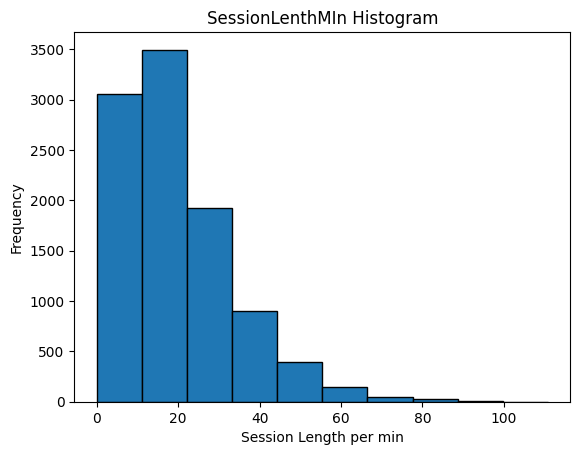

In [11]:
#9.Plot a histogram of SessionLengthMin.
plt.hist(df['SessionLengthMin'],bins=10,edgecolor='black')
plt.xlabel('Session Length per min')
plt.ylabel('Frequency')
plt.title('SessionLenthMIn Histogram')
plt.grid(False)
plt.show()

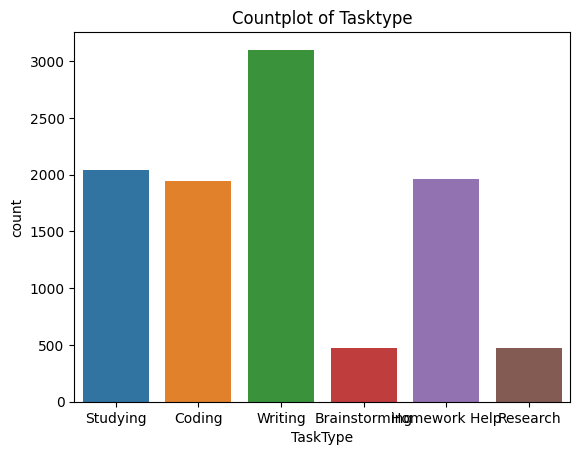

In [13]:
#11.Make a countplot of TaskType using Seaborn.
sns.countplot(x=df['TaskType'])
plt.title('Countplot of Tasktype')
plt.show()

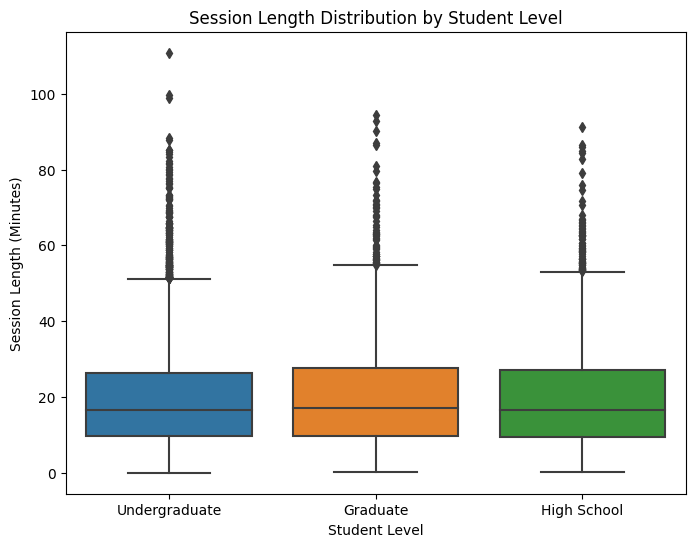

In [14]:
#12.Plot a boxplot of SessionLengthMin grouped by StudentLevel.
plt.figure(figsize=(8, 6))
sns.boxplot(x="StudentLevel", y="SessionLengthMin", data=df)

plt.title("Session Length Distribution by Student Level")
plt.xlabel("Student Level")
plt.ylabel("Session Length (Minutes)")
plt.show()

Text(0.5, 1.0, 'Proportion of Final Outcomes')

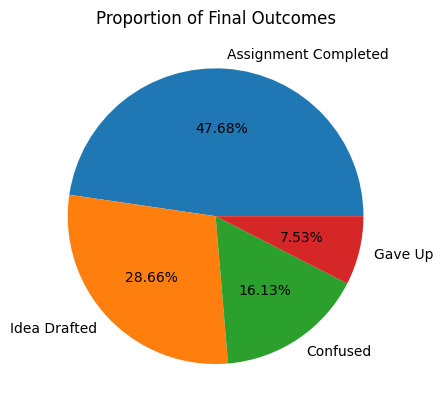

In [15]:
#13.Create a pie chart showing proportions of FinalOutcome.
outcome_proportions = df['FinalOutcome'].value_counts()
plt.pie(outcome_proportions.values, labels=outcome_proportions.index, autopct='%0.2f%%')
plt.title('Proportion of Final Outcomes')

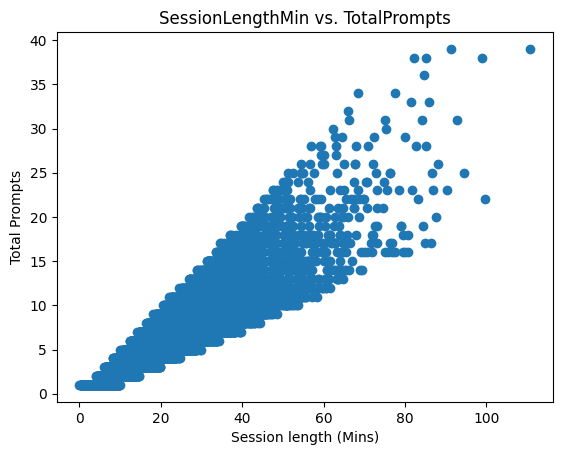

In [16]:
#14.Draw a scatterplot of SessionLengthMin vs. TotalPrompts
plt.scatter(df['SessionLengthMin'], df['TotalPrompts'])
plt.xlabel("Session length (Mins)")
plt.ylabel("Total Prompts")
plt.title("SessionLengthMin vs. TotalPrompts")
plt.show()

Text(0.5, 1.0, 'Line Chart of Average AI Assistance Level over Time')

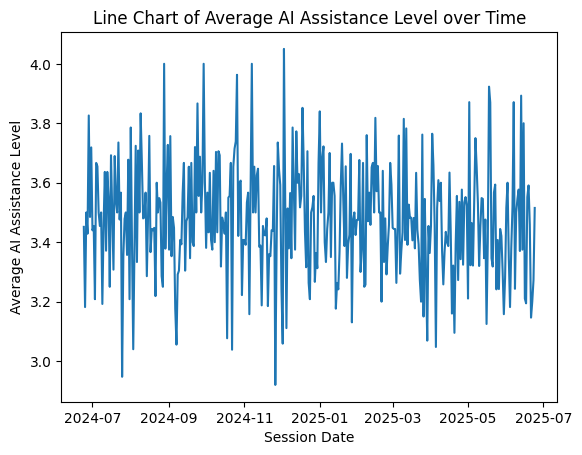

In [17]:
#15.Plot a line chart of average AI_AssistanceLevel over time (SessionDate).
df['SessionDate'] = pd.to_datetime(df['SessionDate'])
avg_ai_level_over_time = df.groupby('SessionDate')['AI_AssistanceLevel'].mean()
plt.plot(avg_ai_level_over_time.index, avg_ai_level_over_time.values)
plt.xlabel('Session Date')
plt.ylabel('Average AI Assistance Level')
plt.title('Line Chart of Average AI Assistance Level over Time')

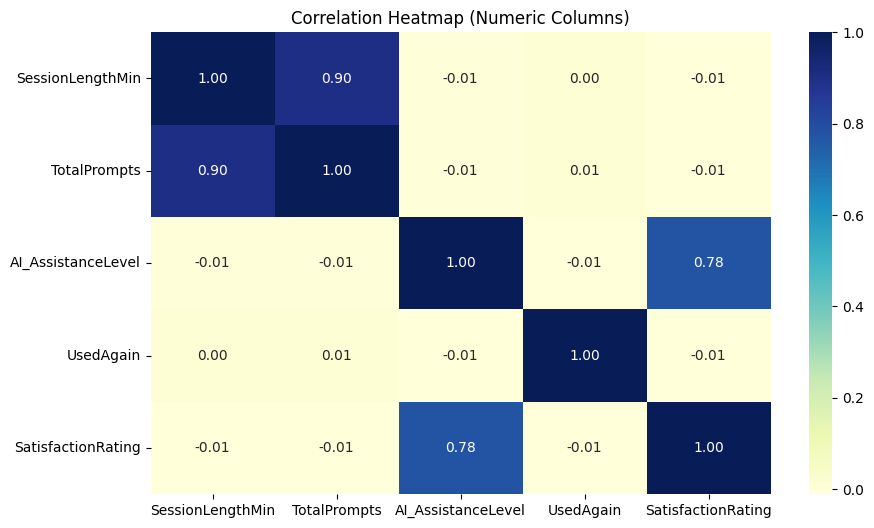

In [18]:
#16.Create a heatmap of correlations among numeric features.
corr_matrix = df.corr(numeric_only=True)
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap='YlGnBu', fmt=".2f")
plt.title("Correlation Heatmap (Numeric Columns)")
plt.show()

#### Part C: GroupBy & Aggregations


In [19]:
#17.Find the average SessionLengthMin for each TaskType.
ave_session_task=df.groupby('TaskType')['SessionLengthMin'].mean()
ave_session_task

TaskType
Brainstorming    21.964223
Coding           19.467659
Homework Help    19.940536
Research         20.410000
Studying         19.705917
Writing          19.705888
Name: SessionLengthMin, dtype: float64

In [20]:
#18.Which Discipline had the most sessions?
df['Discipline'].value_counts()

Discipline
Biology             1458
Computer Science    1445
Engineering         1430
Math                1422
Psychology          1418
History             1417
Business            1410
Name: count, dtype: int64

In [21]:
#19.Compare average AI_AssistanceLevel across StudentLevel.
ai_assist=df.groupby('StudentLevel')['AI_AssistanceLevel'].mean()
ai_assist

StudentLevel
Graduate         3.469674
High School      3.477060
Undergraduate    3.483607
Name: AI_AssistanceLevel, dtype: float64

In [22]:
#20.Find the most common FinalOutcome for Graduate students.
# Filter only Graduate students
graduate_data = df[df["StudentLevel"] == "Graduate"]

# Find the most common FinalOutcome
most_common_outcome = graduate_data["FinalOutcome"].value_counts().idxmax()
count = graduate_data["FinalOutcome"].value_counts().max()

print("Most common FinalOutcome for Graduate students:", most_common_outcome)
print("Count:", count)

Most common FinalOutcome for Graduate students: Assignment Completed
Count: 936


In [23]:
#21.Calculate the median SessionLengthMin for each FinalOutcome.
median_session = df.groupby("FinalOutcome")["SessionLengthMin"].median()

print(median_session)


FinalOutcome
Assignment Completed    16.570
Confused                16.040
Gave Up                 17.290
Idea Drafted            17.085
Name: SessionLengthMin, dtype: float64


In [24]:
#22.Convert SessionDate into Year, Month, and Day columns.
df['SessionDate']=pd.to_datetime(df["SessionDate"])
# Extract Year, Month, and Day into new columns
df["Year"] = df["SessionDate"].dt.year
df["Month"] = df["SessionDate"].dt.month
df["Day"] = df["SessionDate"].dt.day
df[['SessionDate','Year','Month','Day']].head()

,SessionDate,Year,Month,Day
0,2024-11-03,2024,11,3
1,2024-08-25,2024,8,25
2,2025-01-12,2025,1,12
3,2025-05-06,2025,5,6
4,2025-03-18,2025,3,18


#### Part D: Feature Engineering & Encoding


In [25]:
#23.Encode StudentLevel using Label Encoding.
from sklearn.preprocessing import LabelEncoder

# Create encoder
le = LabelEncoder()

# Fit and transform the column
df['StudentLevel_encoded'] = le.fit_transform(df['StudentLevel'])
df[['StudentLevel','StudentLevel_encoded']].head(10)

,StudentLevel,StudentLevel_encoded
0,Undergraduate,2
1,Undergraduate,2
2,Undergraduate,2
3,Undergraduate,2
4,Undergraduate,2
5,Graduate,0
6,High School,1
7,Undergraduate,2
8,Undergraduate,2
9,Undergraduate,2


In [26]:
#24.Apply One-Hot Encoding to TaskType
df_encoded = pd.get_dummies(df['TaskType'],drop_first=True)
print(f"One-Hot Encoded Data using Pandas:\n{df_encoded}\n")

df_encoded=df_encoded.astype(int)#0s and 1s

print(df_encoded.head())


One-Hot Encoded Data using Pandas:
      Coding  Homework Help  Research  Studying  Writing
0      False          False     False      True    False
1      False          False     False      True    False
2       True          False     False     False    False
3       True          False     False     False    False
4      False          False     False     False     True
...      ...            ...       ...       ...      ...
9995   False          False     False      True    False
9996   False          False     False     False     True
9997   False          False     False      True    False
9998   False          False     False     False     True
9999   False          False     False     False     True

[10000 rows x 5 columns]

   Coding  Homework Help  Research  Studying  Writing
0       0              0         0         1        0
1       0              0         0         1        0
2       1              0         0         0        0
3       1              0         0    

In [27]:
#25 Create a new feature: PromptsPerMinute = TotalPrompts / SessionLengthMin.
df['PromptsPerMinute'] = df['TotalPrompts'] / df['SessionLengthMin']
df.head()

,SessionID,StudentLevel,Discipline,SessionDate,SessionLengthMin,TotalPrompts,TaskType,AI_AssistanceLevel,FinalOutcome,UsedAgain,SatisfactionRating,Year,Month,Day,StudentLevel_encoded,PromptsPerMinute
0,SESSION00001,Undergraduate,Computer Science,2024-11-03,31.20,11,Studying,2,Assignment Completed,True,1.0,2024,11,3,2,0.352564
1,SESSION00002,Undergraduate,Psychology,2024-08-25,13.09,6,Studying,3,Assignment Completed,True,2.0,2024,8,25,2,0.458365
2,SESSION00003,Undergraduate,Business,2025-01-12,19.22,5,Coding,3,Assignment Completed,True,3.3,2025,1,12,2,0.260146
3,SESSION00004,Undergraduate,Computer Science,2025-05-06,3.70,1,Coding,3,Assignment Completed,True,3.5,2025,5,6,2,0.270270
4,SESSION00005,Undergraduate,Psychology,2025-03-18,28.12,9,Writing,3,Assignment Completed,True,2.9,2025,3,18,2,0.320057


In [28]:
df['SessionLengthMin'].describe()

count    10000.000000
mean        19.846467
std         13.897302
min          0.030000
25%          9.630000
50%         16.650000
75%         26.670000
max        110.810000
Name: SessionLengthMin, dtype: float64

In [29]:
#26 Bin SessionLengthMin into categories: Short, Medium, Long.
df["SessionLengthCategory"]=pd.cut(df['SessionLengthMin'],
                                   bins=[0,30,60,float('inf')],
                                   labels=["Short","Medium","Long"],
                                   right=False)
df.head()

,SessionID,StudentLevel,Discipline,SessionDate,SessionLengthMin,TotalPrompts,TaskType,AI_AssistanceLevel,FinalOutcome,UsedAgain,SatisfactionRating,Year,Month,Day,StudentLevel_encoded,PromptsPerMinute,SessionLengthCategory
0,SESSION00001,Undergraduate,Computer Science,2024-11-03,31.20,11,Studying,2,Assignment Completed,True,1.0,2024,11,3,2,0.352564,Medium
1,SESSION00002,Undergraduate,Psychology,2024-08-25,13.09,6,Studying,3,Assignment Completed,True,2.0,2024,8,25,2,0.458365,Short
2,SESSION00003,Undergraduate,Business,2025-01-12,19.22,5,Coding,3,Assignment Completed,True,3.3,2025,1,12,2,0.260146,Short
3,SESSION00004,Undergraduate,Computer Science,2025-05-06,3.70,1,Coding,3,Assignment Completed,True,3.5,2025,5,6,2,0.270270,Short
4,SESSION00005,Undergraduate,Psychology,2025-03-18,28.12,9,Writing,3,Assignment Completed,True,2.9,2025,3,18,2,0.320057,Short


#### Part E: Machine Learning (Classification Models)


In [31]:
#27.Predict FinalOutcome using a Decision Tree Classifier.
# drop irrelevant columns
df=df.drop(columns=['SessionID','SessionDate'])
#encode binary column
df['UsedAgain']=df['UsedAgain'].astype(int)
#one hot encode categorical columns
df=pd.get_dummies(df,columns=['Discipline','SessionLengthCategory','StudentLevel', 'TaskType'],drop_first=True)
#Encode target variable
le = LabelEncoder()
df['FinalOutcome_encoded']=le.fit_transform(df['FinalOutcome'])
df=df.drop(columns=['FinalOutcome'])
df.head()


,SessionLengthMin,TotalPrompts,AI_AssistanceLevel,UsedAgain,SatisfactionRating,Year,Month,Day,StudentLevel_encoded,PromptsPerMinute,...,SessionLengthCategory_Medium,SessionLengthCategory_Long,StudentLevel_High School,StudentLevel_Undergraduate,TaskType_Coding,TaskType_Homework Help,TaskType_Research,TaskType_Studying,TaskType_Writing,FinalOutcome_encoded
0,31.20,11,2,1,1.0,2024,11,3,2,0.352564,...,True,False,False,True,False,False,False,True,False,0
1,13.09,6,3,1,2.0,2024,8,25,2,0.458365,...,False,False,False,True,False,False,False,True,False,0
2,19.22,5,3,1,3.3,2025,1,12,2,0.260146,...,False,False,False,True,True,False,False,False,False,0
3,3.70,1,3,1,3.5,2025,5,6,2,0.270270,...,False,False,False,True,True,False,False,False,False,0
4,28.12,9,3,1,2.9,2025,3,18,2,0.320057,...,False,False,False,True,False,False,False,False,True,0


In [32]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report

# Predict FinalOutcome using a Decision Tree
X = df.drop(columns=["FinalOutcome_encoded"])
y = df['FinalOutcome_encoded']
# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

dtree = DecisionTreeClassifier()
dtree = dtree.fit(X_train, y_train)

# Predict and evaluate
y_pred = dtree.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.50      0.48      0.49       930
           1       0.22      0.21      0.21       349
           2       0.13      0.15      0.14       170
           3       0.30      0.31      0.31       551

    accuracy                           0.36      2000
   macro avg       0.29      0.29      0.29      2000
weighted avg       0.36      0.36      0.36      2000



In [33]:
#28 Predict UsedAgain using Logistic Regression.
from sklearn.linear_model import LogisticRegression
X2=df.drop(columns=['UsedAgain'])
y2=df['UsedAgain']
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.2, random_state=42)
logreg=LogisticRegression(max_iter=1000)
logreg.fit(X2_train,y2_train)
y2_pred=logreg.predict(X2_test)
print(classification_report(y2_test,y2_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       615
           1       0.69      1.00      0.82      1385

    accuracy                           0.69      2000
   macro avg       0.35      0.50      0.41      2000
weighted avg       0.48      0.69      0.57      2000



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [34]:
#29 Train a Random Forest Classifier to predict FinalOutcome.
rf=RandomForestClassifier(random_state=42)
rf.fit(X_train,y_train)
y_pred_rf=rf.predict(X_test)
print(classification_report(y_test,y_pred_rf))

              precision    recall  f1-score   support

           0       0.51      0.75      0.61       930
           1       0.36      0.26      0.30       349
           2       0.15      0.03      0.05       170
           3       0.35      0.23      0.28       551

    accuracy                           0.46      2000
   macro avg       0.34      0.31      0.31      2000
weighted avg       0.41      0.46      0.41      2000



In [35]:
#30 Use KNN (K-Nearest Neighbors) to classify UsedAgain.
knn=KNeighborsClassifier()
knn.fit(X2_train,y2_train)
y2_pred_knn=knn.predict(X2_test)
print(classification_report(y2_test,y2_pred_knn))

              precision    recall  f1-score   support

           0       0.33      0.18      0.23       615
           1       0.70      0.84      0.76      1385

    accuracy                           0.63      2000
   macro avg       0.51      0.51      0.50      2000
weighted avg       0.58      0.63      0.60      2000



In [37]:
#31 Train a Naive Bayes Classifier to predict FinalOutcome.
from sklearn.naive_bayes import GaussianNB
nb=GaussianNB()
nb.fit(X_train,y_train)
y_pred_nb=nb.predict(X_test)
print(classification_report(y_test,y_pred_nb))

              precision    recall  f1-score   support

           0       0.51      0.84      0.64       930
           1       0.37      0.32      0.35       349
           2       0.18      0.08      0.11       170
           3       0.38      0.05      0.10       551

    accuracy                           0.47      2000
   macro avg       0.36      0.33      0.30      2000
weighted avg       0.42      0.47      0.39      2000



In [38]:
#32 Build a Gradient Boosting Classifier for UsedAgain.
gb=GradientBoostingClassifier()
gb.fit(X2_train,y2_train)
y2_pred_gb=gb.predict(X2_test)
print(classification_report(y2_test,y2_pred_gb))

              precision    recall  f1-score   support

           0       0.59      0.46      0.52       615
           1       0.78      0.86      0.82      1385

    accuracy                           0.73      2000
   macro avg       0.68      0.66      0.67      2000
weighted avg       0.72      0.73      0.72      2000



In [39]:
#33 Apply an XGBoost Classifier to predict FinalOutcome.
xgb=XGBClassifier()
xgb.fit(X_train,y_train)
y_pred_xgb=xgb.predict(X_test)
print(classification_report(y_test,y_pred_xgb))

              precision    recall  f1-score   support

           0       0.51      0.68      0.58       930
           1       0.33      0.23      0.27       349
           2       0.09      0.02      0.04       170
           3       0.33      0.28      0.30       551

    accuracy                           0.44      2000
   macro avg       0.31      0.30      0.30      2000
weighted avg       0.39      0.44      0.40      2000



In [41]:
#34 Split the dataset into 80% training and 20% testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [42]:
#35 Evaluate one model using accuracy and a confusion matrix.
from sklearn.metrics import accuracy_score, confusion_matrix
# Train KNN
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

# Predict
y_pred = knn.predict(X_test)

# Evaluate
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")
print(confusion_matrix(y_test, y_pred))


Accuracy: 0.3945
[[649  77  25 179]
 [236  44   7  62]
 [130  15   2  23]
 [408  43   6  94]]


In [43]:
#36 Generate a classification report (precision, recall, f1-score).
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.46      0.70      0.55       930
           1       0.25      0.13      0.17       349
           2       0.05      0.01      0.02       170
           3       0.26      0.17      0.21       551

    accuracy                           0.39      2000
   macro avg       0.25      0.25      0.24      2000
weighted avg       0.33      0.39      0.34      2000



#### Part F: Model Evaluation & Hyperparameter Tuning


In [44]:
#37 Perform cross-validation for Logistic Regression.
from sklearn.model_selection import cross_val_score
logreg = LogisticRegression(max_iter=1000)
cv_scores = cross_val_score(logreg, X2, y2, cv=5)
print("Cross-Validation Scores:",cv_scores)

Cross-Validation Scores: [0.7065 0.7065 0.7065 0.7065 0.706 ]


In [45]:
#38 Use GridSearchCV to tune hyperparameters of a Decision Tree.
from sklearn.model_selection import GridSearchCV
param_grid = {
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    "min_samples_leaf": [1, 2, 4],
}
dtree = DecisionTreeClassifier()
grid_search = GridSearchCV(dtree, param_grid, cv=5)
grid_search.fit(X_train, y_train)
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)


Best Hyperparameters: {'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 5}


In [46]:
#39 Tune a Random Forest Classifier (n_estimators, max_depth).
# Define parameter grid
param_grid = {
    'n_estimators': [50, 100, 200],   # number of trees
    'max_depth': [None, 5, 10, 20]    # tree depth
}
rf = RandomForestClassifier()
grid_search = GridSearchCV(rf, param_grid, cv=5)
grid_search.fit(X_train, y_train)
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

Best Hyperparameters: {'max_depth': 10, 'n_estimators': 200}


In [49]:
#40 Compare Logistic Regression, Decision Tree, Random Forest, Naive Bayes, KNN, Gradient Boosting, and XGBoost for predicting UsedAgain.
X2=df.drop(columns=['UsedAgain'])
y2=df['UsedAgain']
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.2, random_state=42)

In [51]:
# Step 2: Define Models

tree = DecisionTreeClassifier(random_state=42)
rf = RandomForestClassifier(n_estimators=100, random_state=42)
log_reg = LogisticRegression(max_iter=1000, random_state=42)
gb = GradientBoostingClassifier(random_state=42)
nb = GaussianNB()
xgb=XGBClassifier()
knn = KNeighborsClassifier(n_neighbors=5)

models= [tree,rf, log_reg, gb, nb, xgb,knn ]

for model in models:
  print(f"Training Model: {model}")
  print("*"*50)
  mol = model.fit(X_train, y_train)
  print(f"Predicting on Model: {model}")
  pred= mol.predict(X_test)
  print("*"*50)
  print(f"classification Report for Model: {model}")
  print("*"*50)
  print(classification_report(y_test, pred))
  print("*"*50)